# Gráficos padronizados em ggplot2
## Bibliotecas


In [37]:
library(ggplot2)
library(scales)

mycolors=c("darkblue", "darkgreen", "darkred", "orange", "purple")

## Datasets de exemplos

In [38]:
dataset_series <- function() {
  series <- NULL
  serie <- matrix(nrow=10, ncol=3)
  serie[,1] = 1:10
  serie[,2] = sin(serie[,1])
  serie[,3] = "sin"
  series = rbind(series, serie)
  serie <- matrix(nrow=10, ncol=3)
  serie[,1] = 1:10
  serie[,2] = cos(serie[,1])
  serie[,3] = "cos"
  series = rbind(series, serie)
  series <- data.frame(x=as.double(series[,1]), y=as.double(series[,2]), class=as.factor(series[,3]))
  return(series)  
}

dataset_bar <- function() {
  series <- matrix(nrow=5, ncol=2)
  series[1,] = c("janeiro", 10)
  series[2,] = c("fevereiro", 9)
  series[3,] = c("março", 11)
  series[4,] = c("abril", 8)
  series[5,] = c("maio", 12)
  series <- data.frame(class=as.factor(series[,1]), y=as.double(series[,2]))  
  return(series)
}

dataset_stackedbar <- function() {
  series <- matrix(nrow=11, ncol=3)
  series[1,] = c("janeiro", 10, "map")
  series[2,] = c("janeiro", 5, "reduce")
  series[3,] = c("janeiro", 7, "splitmap")
  series[4,] = c("fevereiro", 9, "map")
  series[5,] = c("fevereiro", 4, "reduce")
  series[6,] = c("março", 11, "map")
  series[7,] = c("março", 5, "reduce")
  series[8,] = c("abril", 8, "map")
  series[9,] = c("abril", 4, "reduce")
  series[10,] = c("maio", 12, "map")
  series[11,] = c("maio", 6, "reduce")
  series <- data.frame(class=as.factor(series[,1]), group=as.factor(series[,3]), y=as.double(series[,2]))
}




## Plotagem de gráficos de linhas

In [39]:
plot.series <- function(series, label_series=" ", label_x="x", label_y="y", colors=NULL) {
  grf <- ggplot(data=series, aes(x = x, y = y, colour=class))
  grf <- grf + geom_line() + geom_point(data=series, aes(x = x, y = y, colour=class), size=0.5)
  if (!is.null(colors)) {
    grf <- grf + scale_color_manual(values=colors)
  }
  grf <- grf + labs(color=label_series)
  grf <- grf + xlab(label_x)
  grf <- grf + ylab(label_y) 
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.major = element_blank()) + theme(panel.grid.minor = element_blank()) 
  grf <- grf + theme(legend.position = "bottom") + theme(legend.key = element_blank()) 
  return(grf)
}

## Plotagem de gráficos boxplot

In [40]:
plot.boxplot <- function(series, labx = "x", laby = "y", colors = NULL) {
  grf <- ggplot(aes(y = y, x = class), data = series)
  if (!is.null(colors)) {
    grf <- grf + geom_boxplot(color = colors)
  }
  else {
    grf <- grf + geom_boxplot()
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + xlab(labx)
  grf <- grf + ylab(laby)
  return(grf)
}

## Plotagem de gráficos de barra

In [41]:
plot.bar <- function(series, labx="class", laby="y", colors=NULL) {
  grf <- ggplot(series, aes(class, y))
  if (!is.null(colors)) {
    grf <- grf + geom_bar(stat = "identity",fill=colors)
  }
  else {  
    grf <- grf + geom_bar(stat = "identity")
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = series$class)
  return(grf)
}

## Plotagem de gráficos de stacked-bar

In [42]:

plot.stackedbar <- function(series, labx="class", laby="y", colors=NULL) {
  grf <- ggplot(series, aes(x=class, y=y, fill=group)) + geom_bar(stat="identity", colour="white")
  if (!is.null(colors)) {
    grf <- grf + scale_fill_manual("legend", values = colors)
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = unique(series$class))
  return(grf)
}


## Exemplos

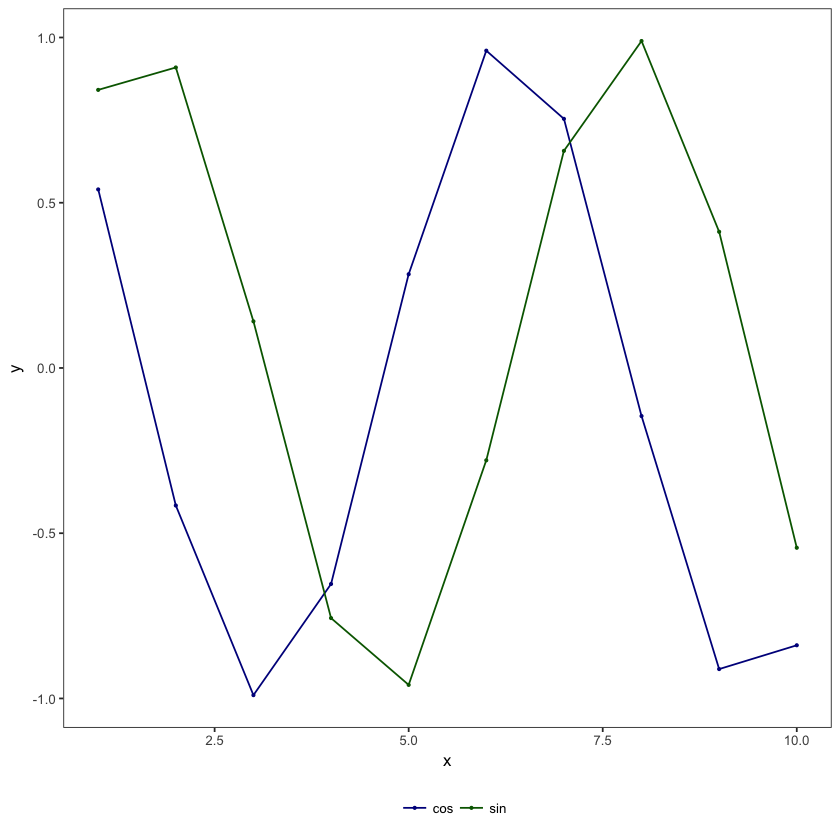

In [43]:
series <- dataset_series()
grf <- plot.series(series,colors=mycolors)
grf
ggsave( "plot_series.pdf", width = 5.5, height = 4)  



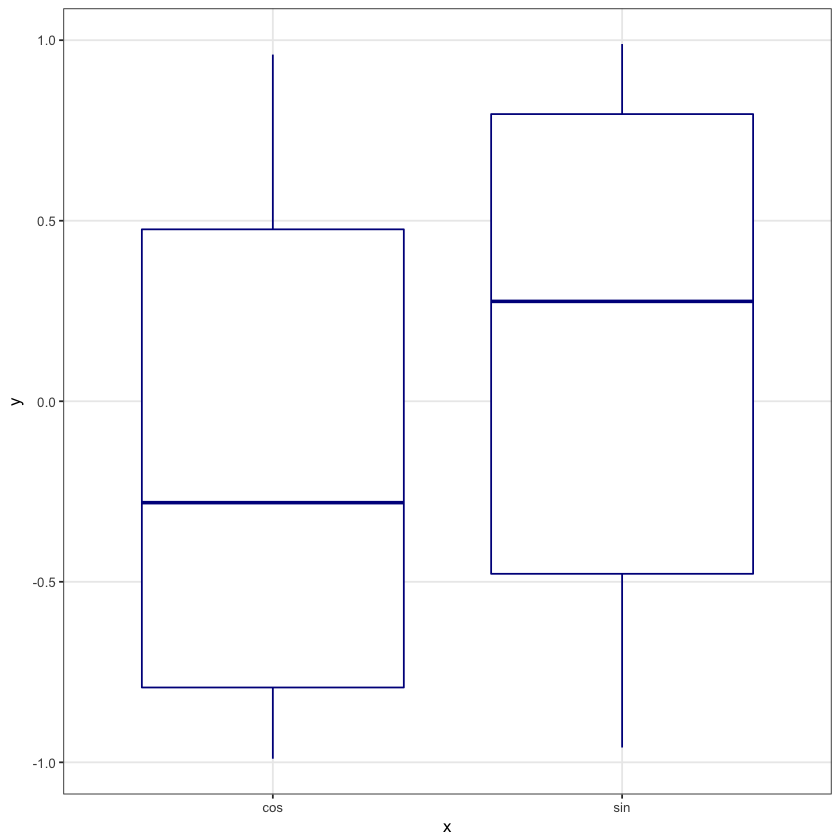

In [44]:
series <- dataset_series()
grf <- plot.boxplot(series, colors=mycolors[1])
grf
ggsave( "plot_boxplot.pdf", width = 5.5, height = 4)  


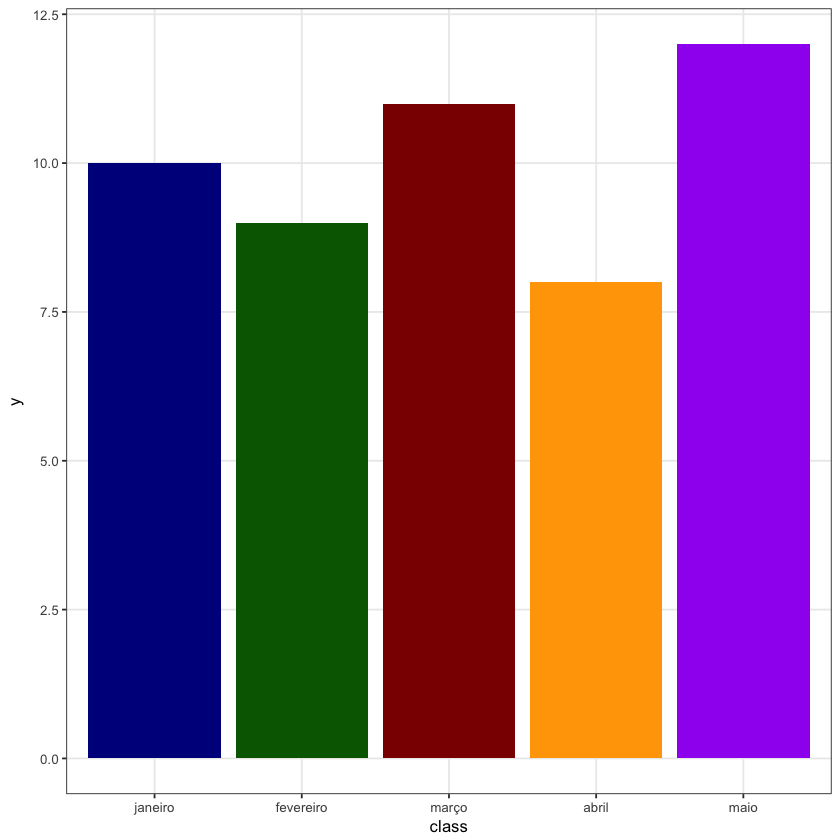

In [45]:
series <- dataset_bar()
grf <- plot.bar(series, colors=mycolors)
grf
ggsave("plot_bar.pdf", width = 5.5, height = 4)    


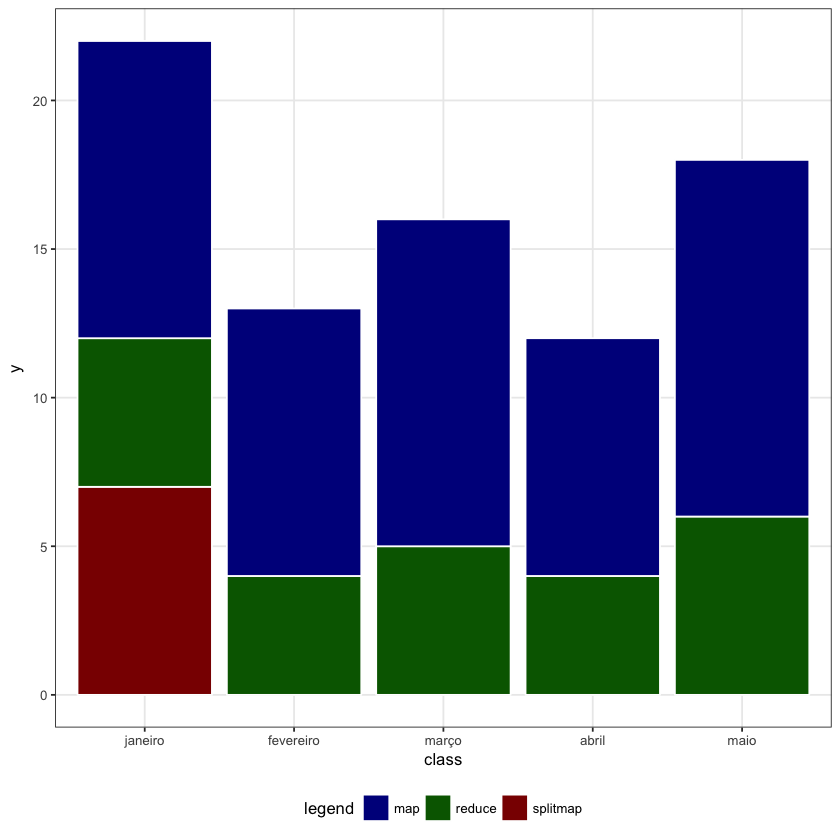

In [46]:
series <- dataset_stackedbar()
grf <- plot.stackedbar(series, colors=mycolors)
grf
ggsave("plot_stackedbar.pdf", width = 5.5, height = 4)    
